In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
%matplotlib inline

%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data

C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


In [2]:
college_data = pd.read_csv('College.csv').rename(columns={'Unnamed: 0': 'University Name'})
college_data.tail()

,University Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [3]:
# college_data = college_data.reset_index()
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2BD3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7CE438>]], dtype=object)

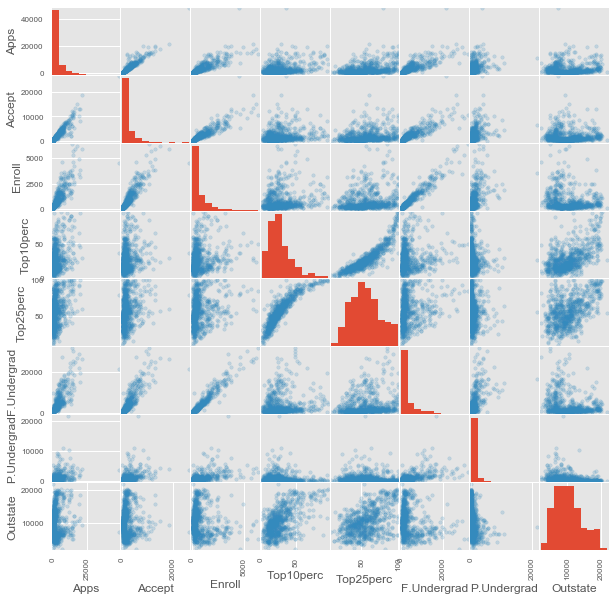

In [4]:
sliced = college_data.ix[:, 0:10]
pd.tools.plotting.scatter_matrix(sliced, alpha=0.2, figsize=(10,10), diagonal='hist')

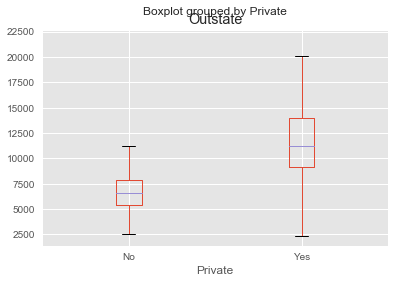

In [5]:
college_data.boxplot(column='Outstate', by="Private")

In [6]:
# Create a new column and give it a value based on certain condition of other columns!!! Pretty cool
college_data.ix[college_data['Top10perc'] > 50, 'Elite'] = 'Yes'
college_data.ix[college_data['Top10perc'] <= 50, 'Elite'] = 'No'

In [7]:
college_data.head(20),
college_data["Elite"].value_counts()
college_data["Private"].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

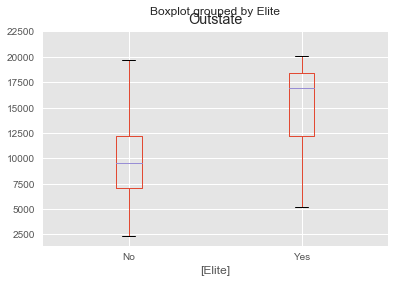

In [8]:
# Boxplot of Outstate vs Private
college_data.boxplot(column='Outstate', by=['Elite'])

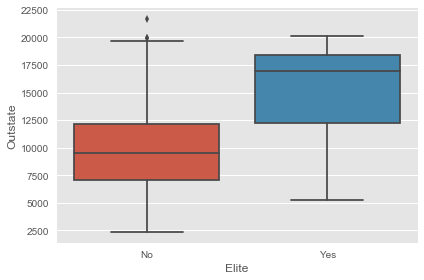

In [9]:
# boxplot for Outstate by Elite
import seaborn as sns
sns.factorplot(kind='box',        # Boxplot
               y='Outstate',       # Y-axis - values for boxplot
#                hue='Private',        # X-axis - first factor
               x='Elite',         # Second factor denoted by color
               data=college_data,        # Dataframe 
               size=4,            # Figure size (x100px)      
               aspect=1.5,        # Width = size * aspect 
               legend_out=False)  # Make legend inside the plot

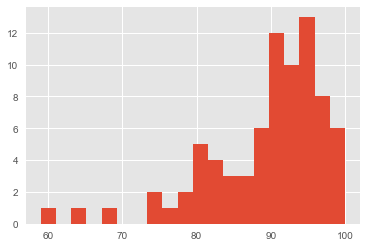

In [10]:
# playing with histgrams
college_data.ix[college_data['Elite'] == 'Yes', 'PhD'].hist(bins=20)


In [11]:
# Exercise 9
auto = pd.read_csv('Auto.csv')
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
# Range of 'mpg'
np.ptp(auto['cylinders'],axis=0)

5

In [13]:
# delete rows from the dataframe
auto_new = auto.drop(auto.index[9:85])
auto_new.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,24.438629,5.370717,187.049844,2933.962617,15.723053,77.152648,1.598131
std,7.908184,1.653486,99.635385,810.642938,2.680514,3.111230,0.816163
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DCBF4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010248550>]], dtype=object)

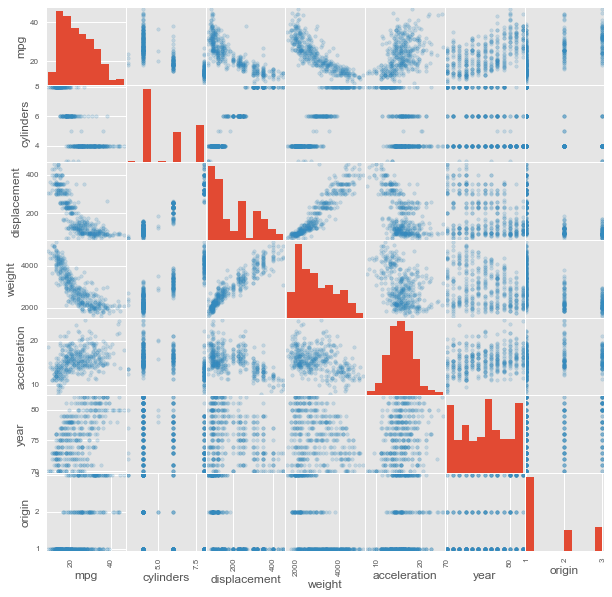

In [14]:
pd.tools.plotting.scatter_matrix(auto, alpha=0.2, figsize=(10,10), diagonal='hist')

In [2]:
# Boston data
boston = pd.read_csv('Boston.csv')
boston.describe()
boston.zn.value_counts()
boston.shape
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

We have 506 observations and 14 variables.

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 dollars 
11. PTRATIO pupil-teacher ratio by town 
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT  lower status of the population 
14. MEDV Median value of owner-occupied homes in $1000's

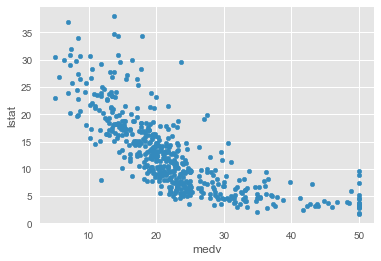

In [6]:
boston.plot('medv', 'lstat', kind='scatter')

The kind keyword argument of plot() accepts a handful of values for plots other than the default Line plot. These include:

‘bar’ or ‘barh’ for bar plots
‘hist’ for histogram
‘box’ for boxplot
‘kde’ or 'density' for density plots
‘area’ for area plots
‘scatter’ for scatter plots
‘hexbin’ for hexagonal bin plots
‘pie’ for pie plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001051B908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000016D8E0B8>]], dtype=object)

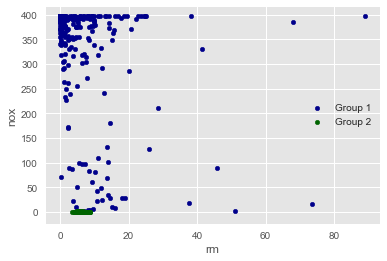

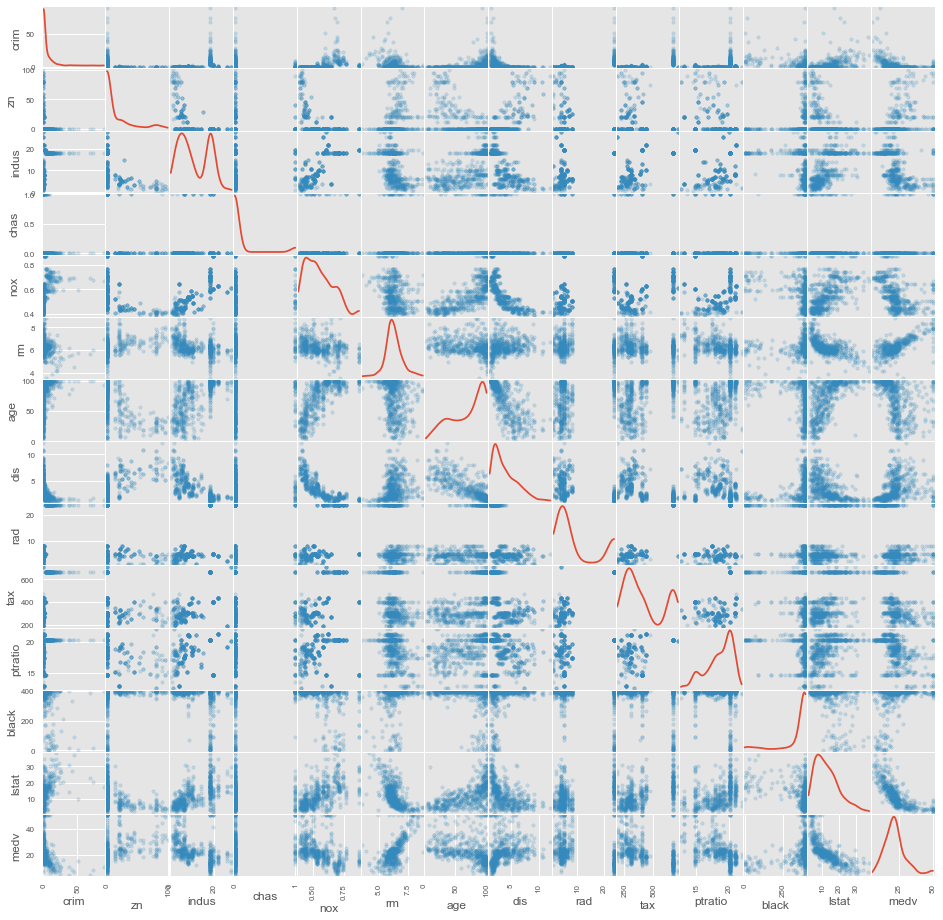

In [17]:
ax = boston.plot(x='crim',y='black', kind='scatter', color='DarkBlue', label='Group 1');
boston.plot(kind='scatter', x='rm', y='nox', color='DarkGreen', label='Group 2', ax=ax)

pd.tools.plotting.scatter_matrix(boston, alpha=0.2, figsize=(16, 16), diagonal='kde')

In [18]:
# how many towns have more than 8 rooms in the house
boston.ptratio.median()
boston.ix[boston['rm'] >= 8,'rm'].count()
boston.ix[boston['rm'] >= 8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


In [22]:
# standard import
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [31]:
from bokeh.charts import Histogram
from bokeh.charts import Scatter
hist = Histogram(boston, values="crim", legend="top_right", bins=12)
show(hist)

In [32]:
p = Scatter(boston, x='crim', y='black')
show(p)

In [34]:
from bokeh.charts import Bar
p = Bar(boston, label='chas', values='rad', agg='sum', 
        title="Max MPG by CYL", legend=None, tools='crosshair')
show(p)

In [35]:
from bokeh.charts import BoxPlot
p = BoxPlot(college_data, label='Elite', values='Outstate', tools='crosshair', color='#aa4444',
            xlabel='', ylabel='petal width, mm', title='Distributions of petal widths')
show(p)

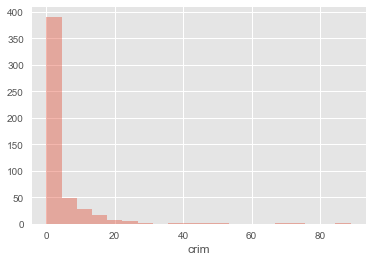

In [20]:
# seaborn
sns.distplot(boston.crim, bins=20, kde=False)  # Make legend inside the plo

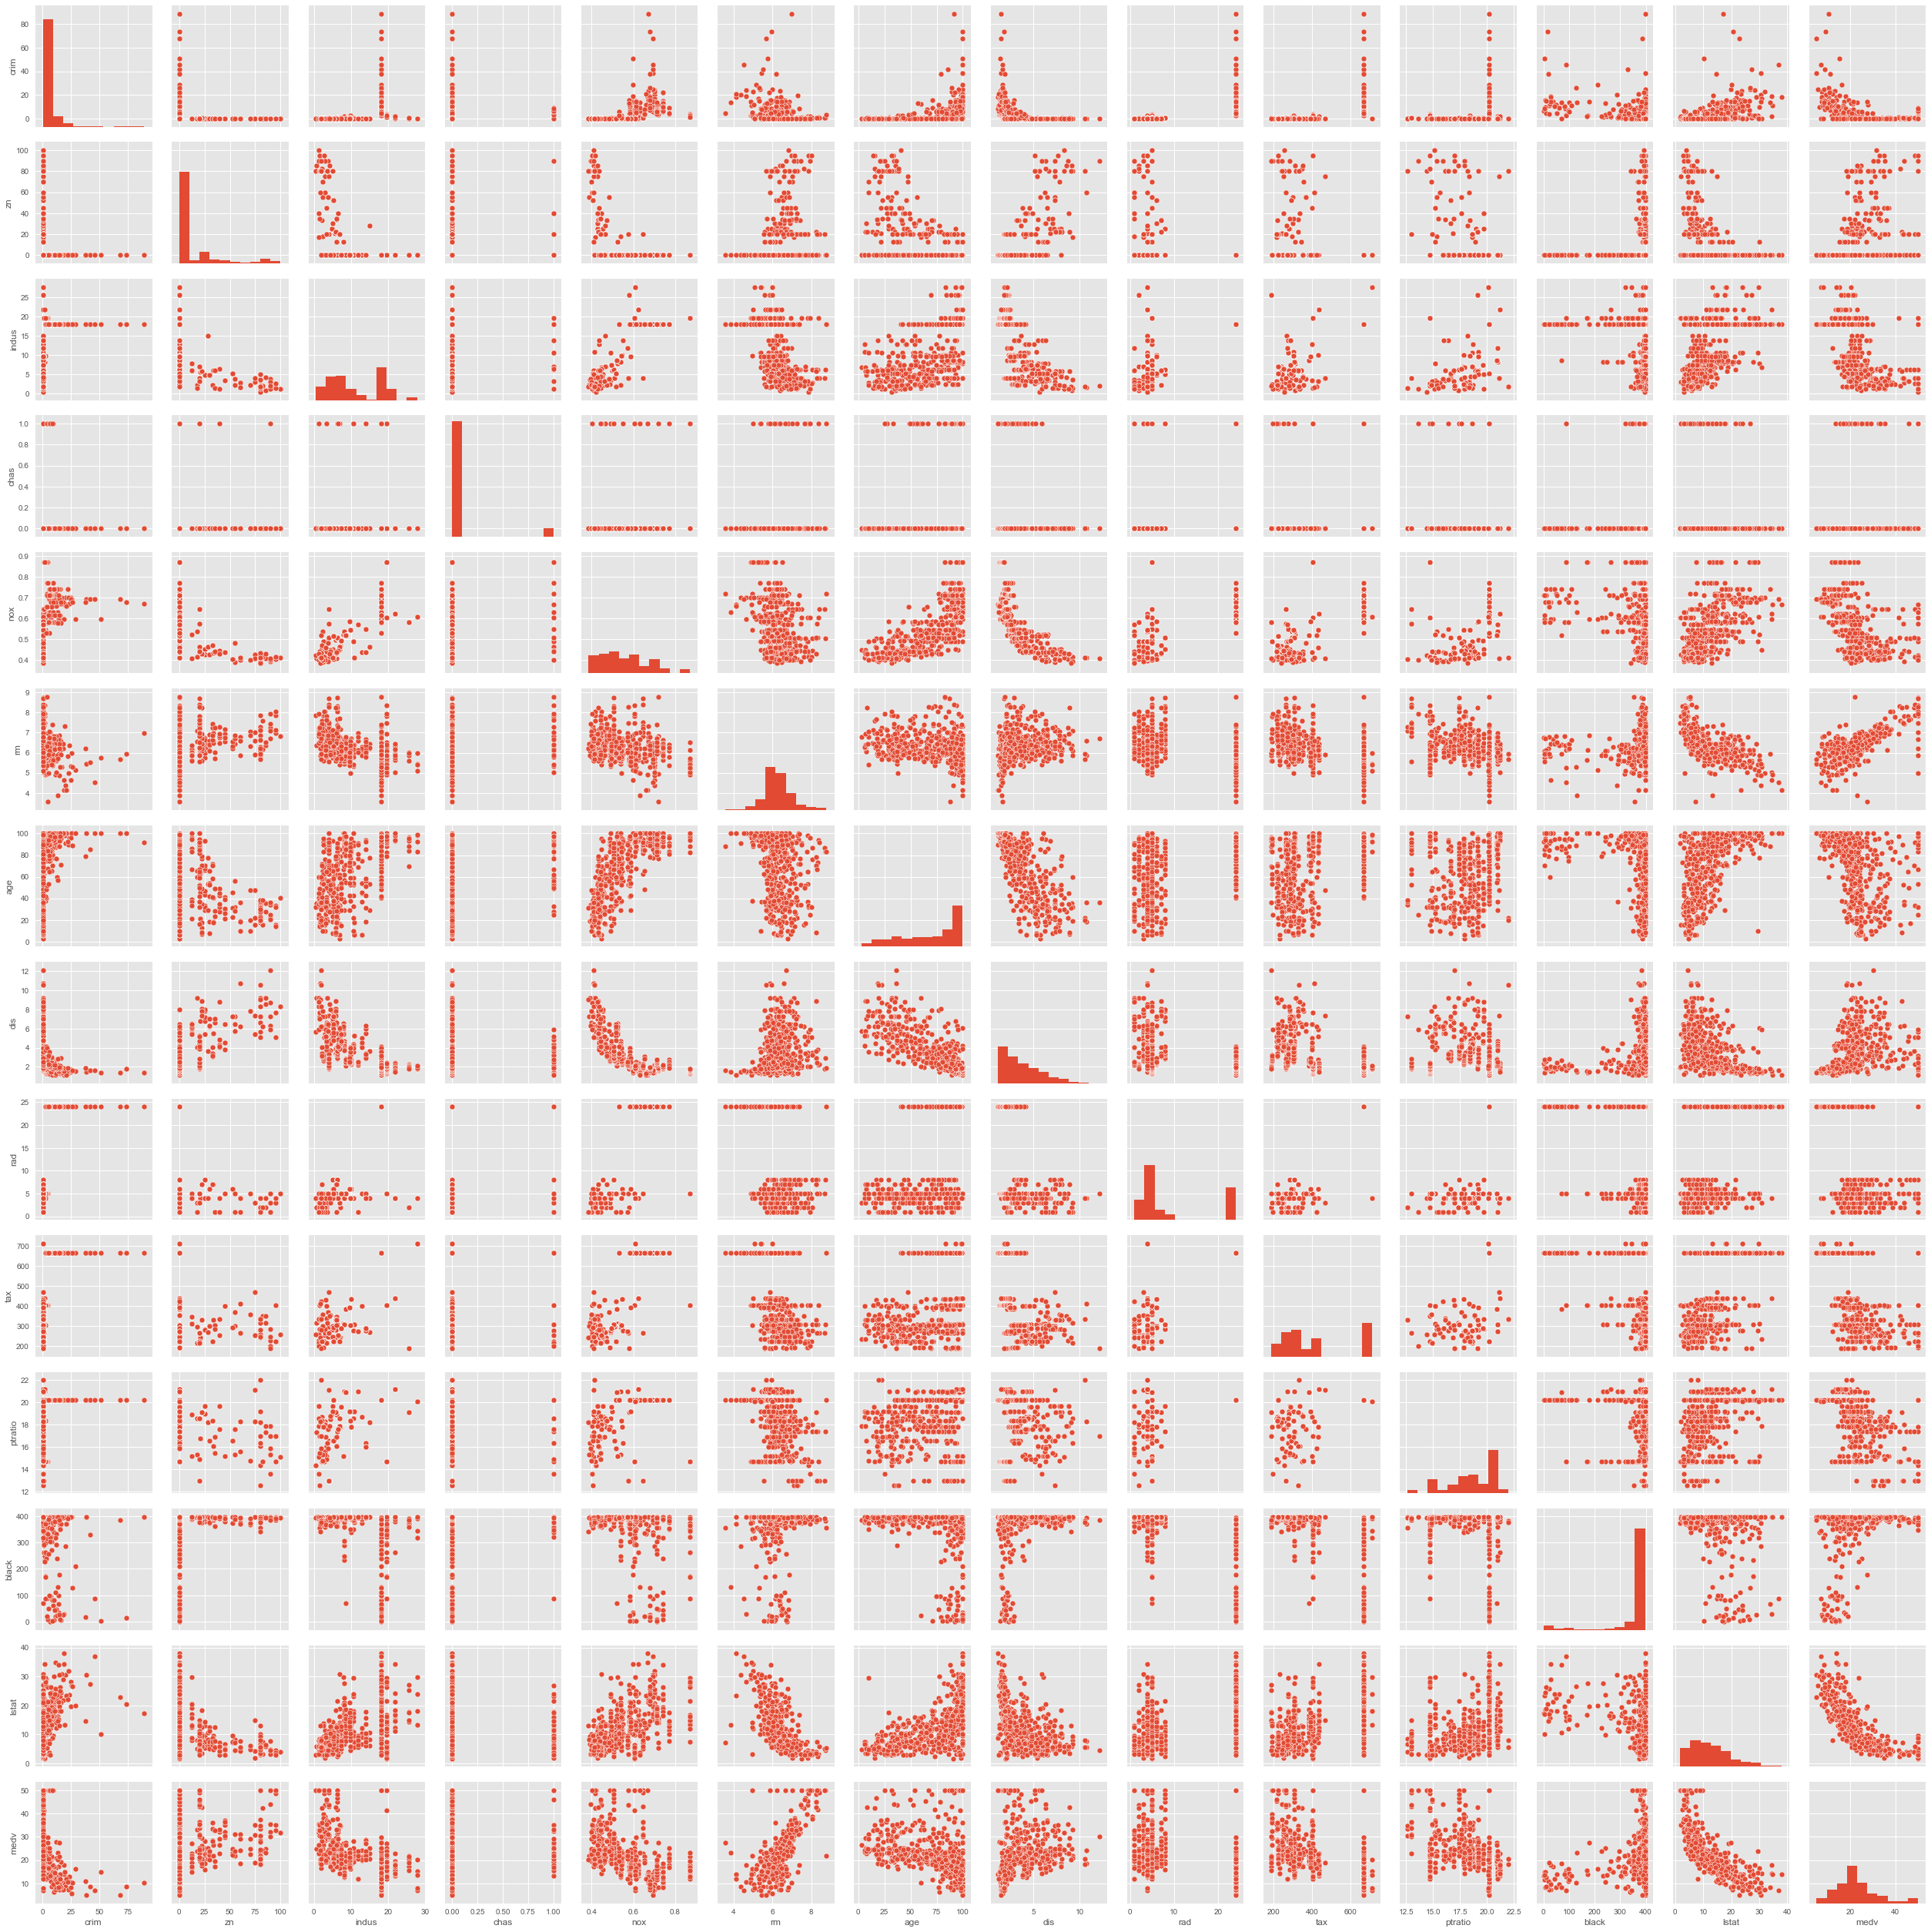

In [7]:
sns.pairplot(boston)